In [1]:
# LOGISTIC REGRESSION MULTICLASS CLASSIFICATION EXERCISE

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sb
from matplotlib import pyplot as plt

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target_name'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.target_name = df.target_name.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [9]:
X = df.drop(['target_name', 'target'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df.target, test_size=0.2)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
model.score(X_test, y_test)

0.9666666666666667

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1])

In [14]:
y_test

119    2
63     1
132    2
42     0
74     1
15     0
104    2
1      0
49     0
97     1
110    2
118    2
114    2
46     0
64     1
8      0
65     1
9      0
58     1
112    2
35     0
135    2
95     1
71     1
92     1
78     1
85     1
113    2
88     1
80     1
Name: target, dtype: int32

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

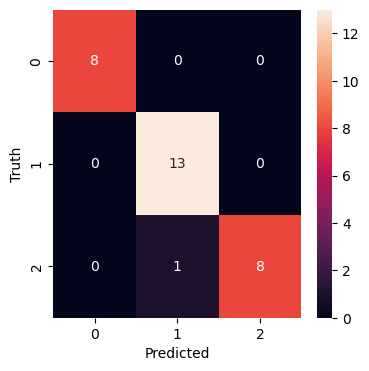

In [16]:
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")